In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Datasets/train.csv")

In [4]:
df.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:
id: Looks like a simple rowID
qid{1,2}: The unique ID of each question in pair
question(1,2): The actual textual content of the questions.
is_duplicate: The label that we are trying to predict - whether the two questions are duplicates of each other

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
166534,166534,27618,71948,How does banning 500 and 1000 rupee notes help...,Will banning 500 and 1000 notes can stop the b...,1
172237,172237,265996,265997,How many classical pianists in the world?,How many amateur classical pianists are there ...,0
336995,336995,464408,464409,Why there is difference in people status like ...,How do I prepare for MUN if my country is Leba...,0
376744,376744,507949,507950,What are the coolest inventions that exist today?,Is Ravindra Jadeja better All rounder than Kal...,0
161302,161302,251389,251390,What is steel?,What is a steel core?,0
176191,176191,133973,271129,Why should we have to talk to the 2 year old b...,I'm 18 years old. I used to masturbate regular...,0
290344,290344,411621,411622,What is the weather forecast prediction for th...,What are the pros and cons of running in tread...,0
352241,352241,481149,481150,What is heartbreak?,I met a girl at a party. Now I don't remember ...,0
74481,74481,127636,127637,What are your experiences with middle child sy...,What is it like to be a middle child?,0
16380,16380,31230,31231,How to Root micromax q350?,How do I root Micromax A068?,0


In [7]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


# Statistics

In [8]:
df.min()

id              0
qid1            1
qid2            2
is_duplicate    0
dtype: int64

In [9]:
df.shape

(404290, 6)

In [10]:
df.size

2425740

In [11]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [12]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [13]:
df.nunique

<bound method DataFrame.nunique of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287 

In [14]:
df.isnull()

,id,qid1,qid2,question1,question2,is_duplicate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
404285,False,False,False,False,False,False
404286,False,False,False,False,False,False
404287,False,False,False,False,False,False
404288,False,False,False,False,False,False


In [15]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [16]:
#duplicate rows
df.duplicated().sum()

0

# Data Visualization

Numbe of duplicates and non-duplicate questions

<AxesSubplot:xlabel='is_duplicate'>

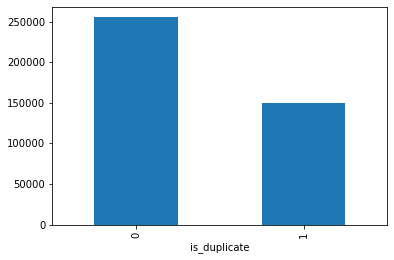

In [17]:
df.groupby("is_duplicate")['id'].count().plot.bar()

<AxesSubplot:ylabel='id'>

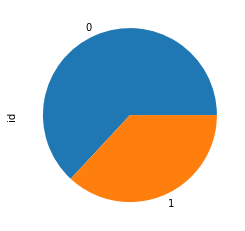

In [18]:
df.groupby("is_duplicate")['id'].count().plot.pie()

In [19]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


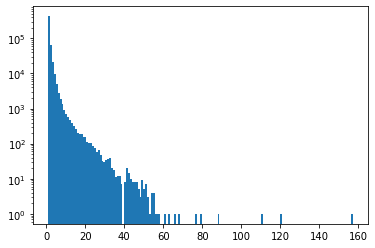

In [20]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()


In [21]:
new_df = df.sample(40000)

In [25]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [26]:
new_df.duplicated().sum()

0

In [27]:
new_df = new_df.dropna()

In [28]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

0    25201
1    14799
Name: is_duplicate, dtype: int64
0    63.0025
1    36.9975
Name: is_duplicate, dtype: float64


<AxesSubplot:>

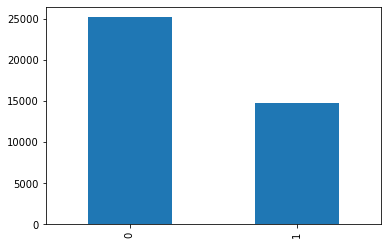

In [29]:
#Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [30]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 72345
Number of questions getting repeated 5457


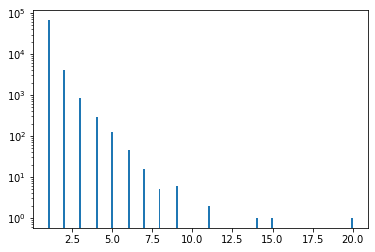

In [31]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [32]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

# Feature engineering


In [33]:
#question length

In [34]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [35]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
140948,140948,186132,223886,Poll Question! If you shoot me in The head at ...,If you shoot me between the eyes with a 50AE D...,1,94,131
157276,157276,245964,245965,What is resource economics in construction and...,Is Real Madrid Dependent on Cristiano Ronaldo?,0,64,46
27187,27187,50525,50526,Why it is said that a good designer is a keen ...,What is a good logo design?,0,55,27
129340,129340,207796,207797,What's the longest staircase in the world (any...,Where is the world's longest escalator?,0,57,39
306543,306543,211896,204406,How can I improve my voice for singing?,What should I do make my voice soft and improv...,1,39,77


In [36]:
#count words in questions

In [37]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
140948,140948,186132,223886,Poll Question! If you shoot me in The head at ...,If you shoot me between the eyes with a 50AE D...,1,94,131,20,25
157276,157276,245964,245965,What is resource economics in construction and...,Is Real Madrid Dependent on Cristiano Ronaldo?,0,64,46,9,7
27187,27187,50525,50526,Why it is said that a good designer is a keen ...,What is a good logo design?,0,55,27,12,6
129340,129340,207796,207797,What's the longest staircase in the world (any...,Where is the world's longest escalator?,0,57,39,9,6
306543,306543,211896,204406,How can I improve my voice for singing?,What should I do make my voice soft and improv...,1,39,77,8,15


In [38]:
#Common words

In [39]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [40]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
140948,140948,186132,223886,Poll Question! If you shoot me in The head at ...,If you shoot me between the eyes with a 50AE D...,1,94,131,20,25,11
157276,157276,245964,245965,What is resource economics in construction and...,Is Real Madrid Dependent on Cristiano Ronaldo?,0,64,46,9,7,1
27187,27187,50525,50526,Why it is said that a good designer is a keen ...,What is a good logo design?,0,55,27,12,6,3
129340,129340,207796,207797,What's the longest staircase in the world (any...,Where is the world's longest escalator?,0,57,39,9,6,2
306543,306543,211896,204406,How can I improve my voice for singing?,What should I do make my voice soft and improv...,1,39,77,8,15,6


In [41]:
#total words

In [42]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [43]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
140948,140948,186132,223886,Poll Question! If you shoot me in The head at ...,If you shoot me between the eyes with a 50AE D...,1,94,131,20,25,11,44
157276,157276,245964,245965,What is resource economics in construction and...,Is Real Madrid Dependent on Cristiano Ronaldo?,0,64,46,9,7,1,16
27187,27187,50525,50526,Why it is said that a good designer is a keen ...,What is a good logo design?,0,55,27,12,6,3,16
129340,129340,207796,207797,What's the longest staircase in the world (any...,Where is the world's longest escalator?,0,57,39,9,6,2,14
306543,306543,211896,204406,How can I improve my voice for singing?,What should I do make my voice soft and improv...,1,39,77,8,15,6,21


In [44]:
#word share

In [45]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
140948,140948,186132,223886,Poll Question! If you shoot me in The head at ...,If you shoot me between the eyes with a 50AE D...,1,94,131,20,25,11,44,0.25
157276,157276,245964,245965,What is resource economics in construction and...,Is Real Madrid Dependent on Cristiano Ronaldo?,0,64,46,9,7,1,16,0.06
27187,27187,50525,50526,Why it is said that a good designer is a keen ...,What is a good logo design?,0,55,27,12,6,3,16,0.19
129340,129340,207796,207797,What's the longest staircase in the world (any...,Where is the world's longest escalator?,0,57,39,9,6,2,14,0.14
306543,306543,211896,204406,How can I improve my voice for singing?,What should I do make my voice soft and improv...,1,39,77,8,15,6,21,0.29


# Analysis of features

minimum characters 1
maximum characters 354
average num of characters 59


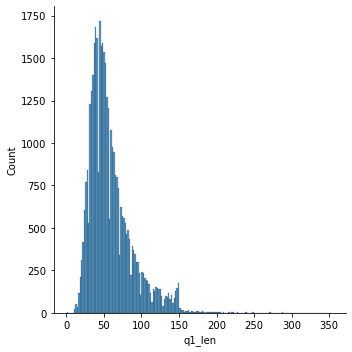

In [46]:
#q1
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 5
maximum characters 823
average num of characters 59


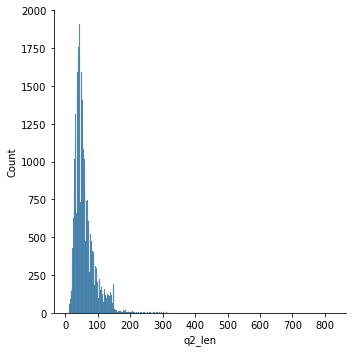

In [47]:
#q2
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 66
average num of words 10


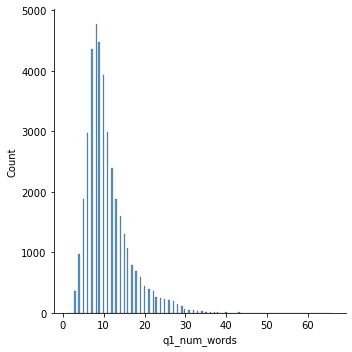

In [48]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 2
maximum words 149
average num of words 11


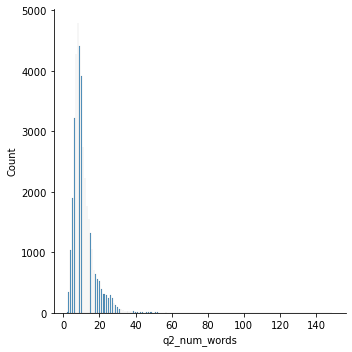

In [49]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

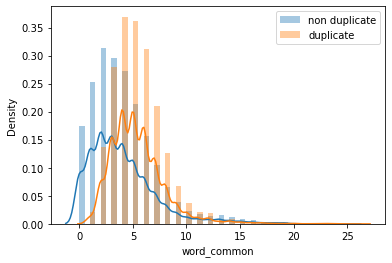

In [50]:
# common words

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

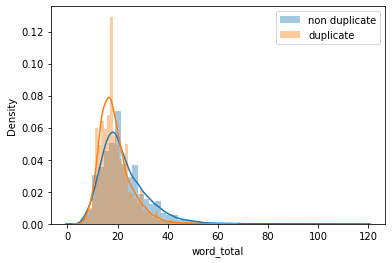

In [51]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

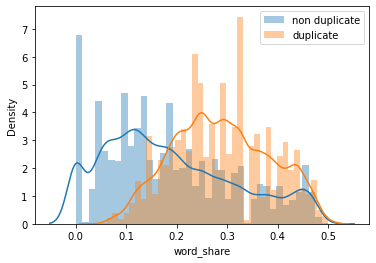

In [52]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [53]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
140948,Poll Question! If you shoot me in The head at ...,If you shoot me between the eyes with a 50AE D...
157276,What is resource economics in construction and...,Is Real Madrid Dependent on Cristiano Ronaldo?
27187,Why it is said that a good designer is a keen ...,What is a good logo design?
129340,What's the longest staircase in the world (any...,Where is the world's longest escalator?
306543,How can I improve my voice for singing?,What should I do make my voice soft and improv...


In [54]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(40000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
140948,1,94,131,20,25,11,44,0.25
157276,0,64,46,9,7,1,16,0.06
27187,0,55,27,12,6,3,16,0.19
129340,0,57,39,9,6,2,14,0.14
306543,1,39,77,8,15,6,21,0.29


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [56]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(40000, 6000)

In [57]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(40000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
140948,1,94,131,20,25,11,44,0.25,0,0,...,0,1,0,0,0,0,0,0,0,0
157276,0,64,46,9,7,1,16,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
27187,0,55,27,12,6,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
129340,0,57,39,9,6,2,14,0.14,0,0,...,0,0,0,0,0,0,0,0,0,0
306543,1,39,77,8,15,6,21,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,
final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.772125

In [60]:
print("Accuracy: ",accuracy_score(y_test,y_pred) * 100)

Accuracy:  77.21249999999999


# Xgboost

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)


0.768875

In [62]:
print("Accuracy: ",accuracy_score( y_test,y_pred) * 100)

Accuracy:  76.8875


In [63]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [64]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    return np.hstack((np.array(input_query).reshape(1,7),q1_bow,q2_bow))

In [65]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of India ?'
q3 = 'Which city serves as the capital of Pakistan?'
q4 = 'Where is the capital of India?'


In [66]:
import re
from bs4 import BeautifulSoup

import requests, os, string

rf.predict(query_point_creator(q1,q3))

array([0], dtype=int64)

In [67]:
rf.predict(query_point_creator(q1,q4))

array([1], dtype=int64)

In [68]:
q5='hii'
q6='hello'

In [69]:
rf.predict(query_point_creator(q5,q6))

array([0], dtype=int64)

In [70]:
q7='How was your day'
q8='What is your name'

In [71]:
rf.predict(query_point_creator(q7,q8))

array([0], dtype=int64)

In [72]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [156]:
load_model = pickle.load(open(filename,'rb'))



In [73]:
q1='What is your aim'
q2='What is your aim'

In [74]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [75]:
q9='Why do you downvote answers?'
q10='How do I use downvote correctly?'

In [76]:
rf.predict(query_point_creator(q9,q10))

array([0], dtype=int64)